In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import missingno as msn

pd.options.mode.chained_assignment = None 

from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [2]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [3]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

In [4]:
def ploter_title(y_test_0,X_test_0,pronosticados_0,model,titulo,ejex,ejey,color_user,ruta="./savedpic.png",dpi_user=300):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color=color_user)
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel(ejex)
    plt.ylabel(ejey)
    plt.title(titulo)
    plt.savefig(ruta, dpi=dpi_user)
    plt.show()

### Cargamos los modelos:

In [187]:
conta = 'PM10'
model = [0 for col in range(25)]
modelq = [0 for col in range(25)]

In [210]:
for i in range(0,13):
    model[i] = joblib.load(str('./modelos/'+ conta +'/'+ conta + '_'+str(i+1)+'hora.pkl'))
    print(str('./modelos/' + conta + '/' + conta + '_' + str(i+1)+'hora.pkl'))
    #modelq[i] = joblib.load(str('./modelos/'+conta+'/' + conta+ '_'+str(i+1)+'hora_quantile.pkl'))
    if i == range(0,24)[-1]:
        print('./modelos/O3/O3_'+str(i+1)+'hora.pkl')

[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_1hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_2hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_3hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_4hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_5hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM10/PM10_6hora.pkl
[18:11:38] WARNING: /workspace/src/objective/regression_ob

In [212]:
model[12]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=nan, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

## Cargamos los datos:

In [213]:
data_hour_merge = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos_modelos_PM10.csv")

In [214]:
data_hour_merge = data_hour_merge[data_hour_merge.fecha > "2019-01-01 00:00:00"]

In [215]:
target = "PM10mean_max_frcst_"

In [216]:
lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))
lista[1]

'PM10mean_max_frcst_2'

In [217]:
data_hour_merge[["fecha","PM10mean_0.0_max","PM10mean_max_frcst_1","PM10mean_max_frcst_2","PM10mean_max_frcst_12"]].head(13)

,fecha,PM10mean_0.0_max,PM10mean_max_frcst_1,PM10mean_max_frcst_2,PM10mean_max_frcst_12
24896,2019-01-01 04:00:00,88.291667,98.000000,106.208333,149.250000
24897,2019-01-01 05:00:00,98.000000,106.208333,114.458333,150.958333
24898,2019-01-01 06:00:00,106.208333,114.458333,121.083333,152.125000
24899,2019-01-01 07:00:00,114.458333,121.083333,124.916667,152.333333
24900,2019-01-01 08:00:00,121.083333,124.916667,129.875000,150.875000
24901,2019-01-01 09:00:00,124.916667,129.875000,135.375000,149.958333
24902,2019-01-01 10:00:00,129.875000,135.375000,141.583333,150.125000
24903,2019-01-01 11:00:00,135.375000,141.583333,145.208333,151.958333
24904,2019-01-01 12:00:00,141.583333,145.208333,147.083333,151.041667
24905,2019-01-01 13:00:00,145.208333,147.083333,148.250000,149.000000


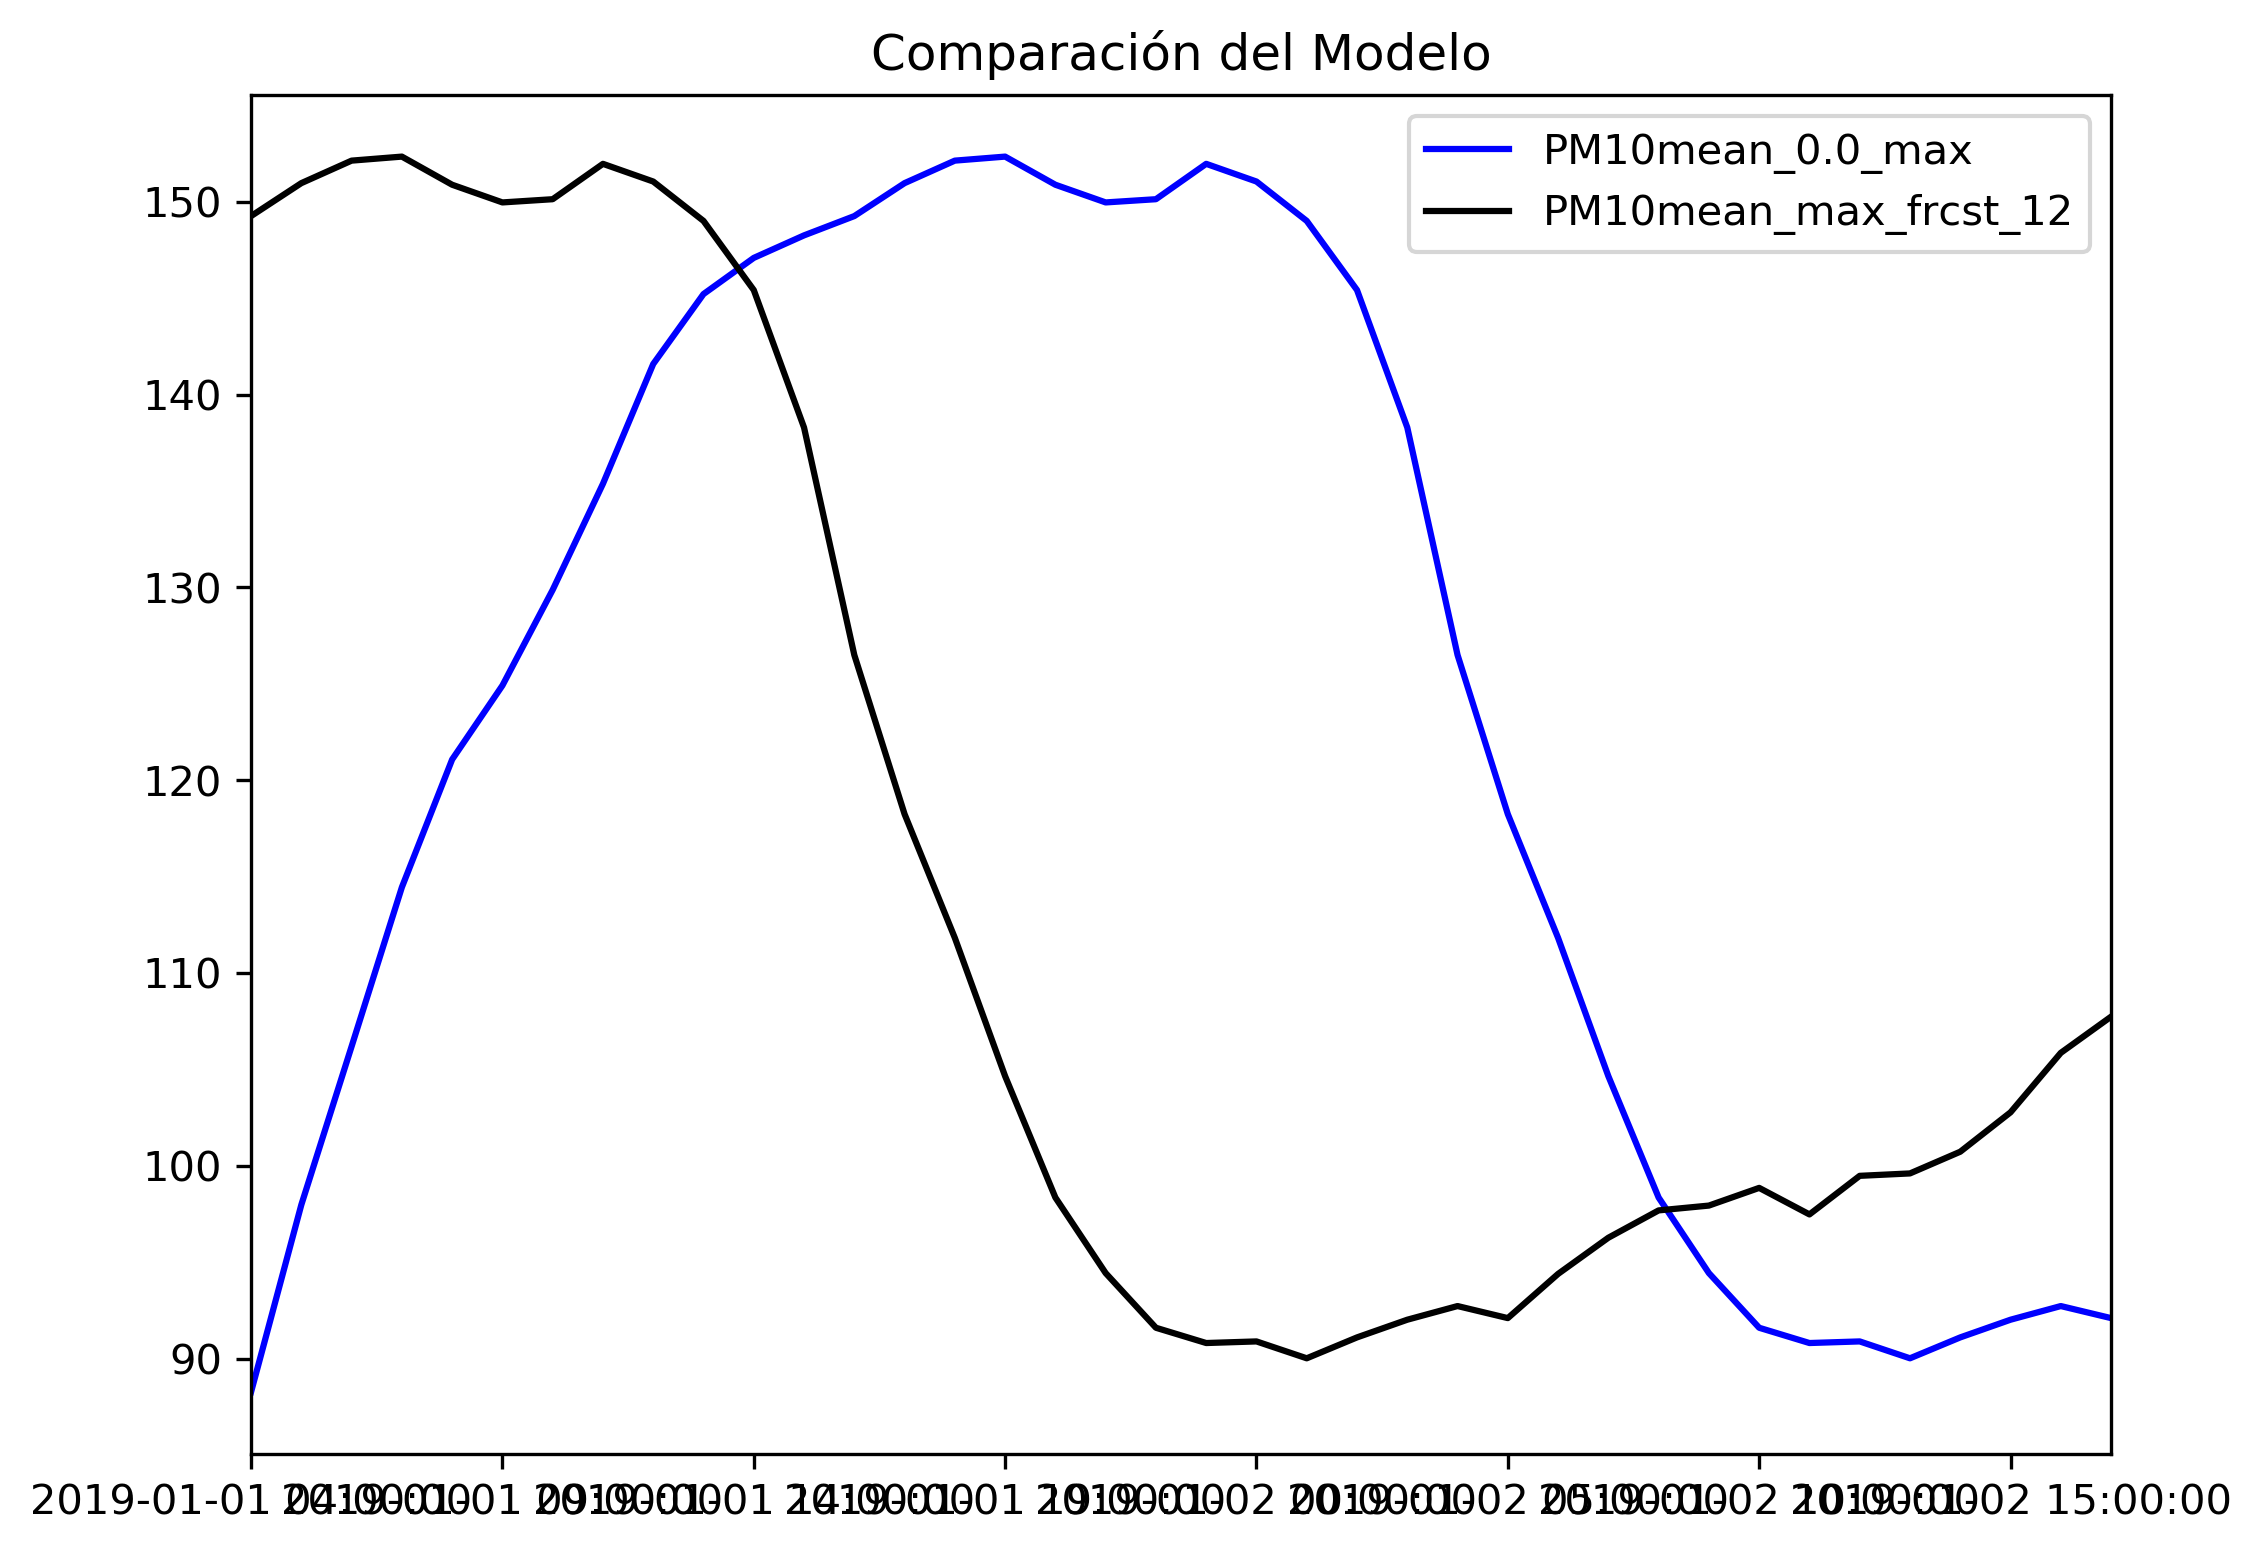

In [218]:
fig = plt.figure(figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = fig.gca()

#df_predict_O3['fecha'] = pd.to_datetime(df_predict_O3['fecha'], format='%Y-%m-%d %H:%M:%S')3
#df_predict['fecha'] = pd.to_datetime(df_predict['fecha'], format='%Y-%m-%d %H:%M:%S')

data_hour_merge[data_hour_merge.fecha < "2019-01-02 18:00:00"].plot(x="fecha", y=["PM10mean_0.0_max"],ax=ax,color="blue")
data_hour_merge[data_hour_merge.fecha < "2019-01-02 18:00:00"].plot(x="fecha", y=["PM10mean_max_frcst_12"],ax=ax,color="black")




#plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")
plt.xlabel("")



plt.legend()
plt.show()

In [219]:
data_hour_merge.drop("fecha",axis=1,inplace=True)

Dividimos el DS

In [220]:
hora = 12

dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

#Definimos los conjuntos de prueba:

#X_train_O3, X_test_O3, y_train_O3, y_test_O3 = train_test_split(X, y, test_size=0.3, random_state=123)


In [257]:
data_hour_merge = data_hour_merge[data_hour_merge.fecha > "2019-01-01 00:00:00"]
data_hour_merge["PM10_pronosticados_12"] = model[12].predict(X)
data_hour_merge["PM10_pronosticados_12"] = data_hour_merge["PM10_pronosticados_12"].shift(12)

In [258]:
data_hour_merge.head(15)

,fecha,PM10mean_0.0_max,PM10movil24_pronosticado_12hr,PM10_pronosticados_12
24896,2019-01-01 04:00:00,88.291667,NaN,NaN
24897,2019-01-01 05:00:00,98.000000,NaN,NaN
24898,2019-01-01 06:00:00,106.208333,NaN,NaN
24899,2019-01-01 07:00:00,114.458333,NaN,NaN
24900,2019-01-01 08:00:00,121.083333,NaN,NaN
24901,2019-01-01 09:00:00,124.916667,NaN,NaN
24902,2019-01-01 10:00:00,129.875000,NaN,NaN
24903,2019-01-01 11:00:00,135.375000,NaN,NaN
24904,2019-01-01 12:00:00,141.583333,NaN,NaN
24905,2019-01-01 13:00:00,145.208333,NaN,NaN


In [259]:
data_hour_merge = data_hour_merge[["fecha","PM10mean_0.0_max","PM10_pronosticados_12"]]
data_hour_merge=data_hour_merge.rename(columns={'"PM10mean_0.0_max"': 'PM10movil24_real', 'PM10_pronosticados_12': 'PM10movil24_pronosticado_12hr'})
data_hour_merge.head(24)

,fecha,PM10mean_0.0_max,PM10movil24_pronosticado_12hr
24896,2019-01-01 04:00:00,88.291667,NaN
24897,2019-01-01 05:00:00,98.000000,NaN
24898,2019-01-01 06:00:00,106.208333,NaN
24899,2019-01-01 07:00:00,114.458333,NaN
24900,2019-01-01 08:00:00,121.083333,NaN
24901,2019-01-01 09:00:00,124.916667,NaN
24902,2019-01-01 10:00:00,129.875000,NaN
24903,2019-01-01 11:00:00,135.375000,NaN
24904,2019-01-01 12:00:00,141.583333,NaN
24905,2019-01-01 13:00:00,145.208333,NaN


In [248]:
data_hour_merge.to_csv(str("./datos_2019_PM10.csv"),index=False)

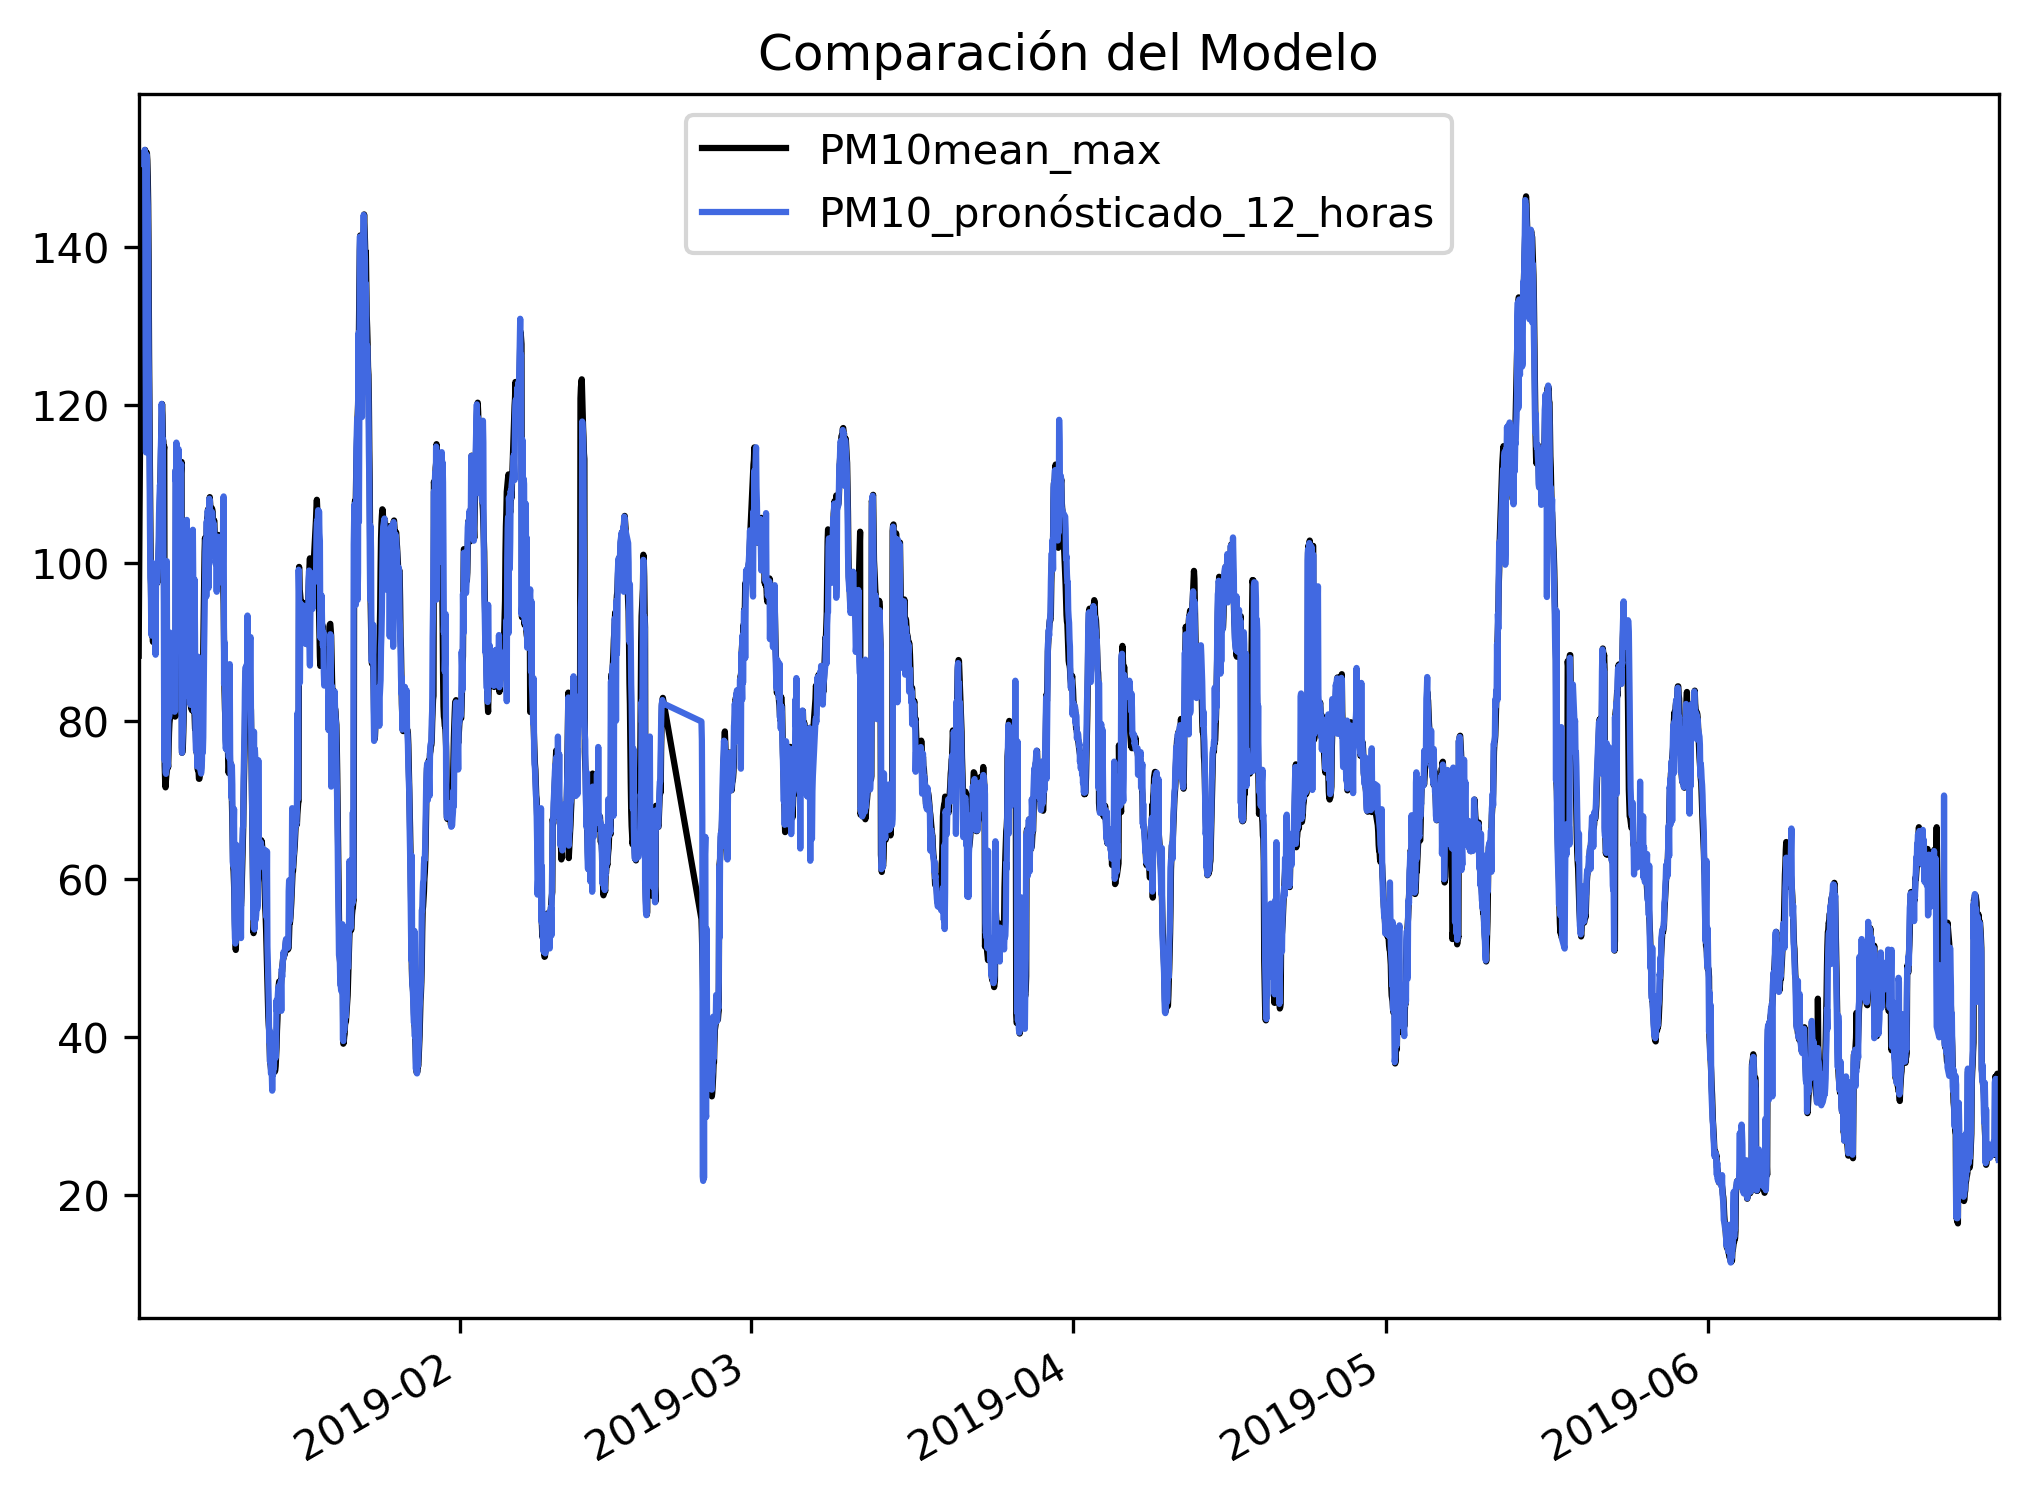

In [242]:
fig = plt.figure(figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = fig.gca()


data_hour_merge['fecha'] = pd.to_datetime(data_hour_merge['fecha'], format='%Y-%m-%d %H:%M:%S')
data_hour_merge.plot(x="fecha", y=["PM10mean_0.0_max"],ax=ax,label=["PM10mean_max"],color="black")


data_hour_merge.plot(x="fecha", y=["PM10_pronosticados_12"],ax=ax,label=["PM10_pronósticado_12_horas"],color="royalblue")
#data_hour_merge.plot(x="fecha", y=["PM10mean_max_12"],ax=ax,label=["PM10real"],
 #                                    color="midnightblue",dashes=[3,2])



#plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")
plt.xlabel("")



plt.legend()
plt.show()